El codigo que se desarrolla a continuación viene explicado en el archivo pdf adjuntado. En la parte 'explicacion del codigo' se explican cada una de las partes del mismo

## 1º Importacion de las librerías que se van a usar

In [1]:
import math
from bs4 import BeautifulSoup
import pickle
import requests
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import os
import yfinance as yf
import numpy as np
import urllib.parse
import requests
import json
import urllib.request
import lxml
from requests.exceptions import HTTPError
from pathlib import Path
#import talib

## 2º extraccion de los tickers de las empresas.

Extraccion tickers empresas bolsa de nueva york

In [115]:
def tickers_NYSE()
    letras=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    tickers_empresas=[]
    for letra in letras:
        url='https://www.findata.co.nz/markets/NYSE/symbols/'+letra+'.htm'
        req = urllib.request.Request(
            url, 
            data=None, 
            headers={
                'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
            }
        )


        f = urllib.request.urlopen(req)
        soup = BeautifulSoup(f)
        tags = soup('a')

        for tag in tags:
            if tag.text.isupper():
            #print(tag.text)
                tickers_empresas.append(tag.text)
                
    tickers_empresas=set(tickers_empresas)
                
    with open('NYSE.pickle','wb') as f:
        pickle.dump(tickers_empresas,f)#'serializa' objetos 
                
#tickers_NYSE()



Extraccion tickers sp500

In [2]:
def tickers_SP500():
    tickers_empresas_SP500=[]
    url= 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    req = urllib.request.Request(
            url, 
            data=None, 
            headers={
                'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
            }
        )


    f = urllib.request.urlopen(req)
    soup = BeautifulSoup(f)
    tags = soup('a', class_ = "external text")

    for tag in tags:
        if tag.text.isupper():
        #print(tag.text)
            tickers_empresas_SP500.append(tag.text)

    with open('SP500.pickle','wb') as f:
            pickle.dump(tickers_empresas_SP500,f)#'serializa' objetos 

#tickers_SP500()

extraccion de empresas del IBEX35

In [364]:
def tickers_IBEX35():
    tickers_empresas_IBEX=[]
    url= 'https://es.finance.yahoo.com/quote/%5EIBEX/components/'
    req = urllib.request.Request(
            url, 
            data=None, 
            headers={
                'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
            }
        )


    f = urllib.request.urlopen(req)
    soup = BeautifulSoup(f)
    tags = soup('a', class_ = "C($linkColor) Cur(p) Td(n) Fw(500)")

    for tag in tags:
        if tag.text.isupper():
            #print(tag.text)
            tickers_empresas_IBEX.append(tag.text)

    with open('IBEX.pickle','wb') as f:
            pickle.dump(tickers_empresas_IBEX,f)#'serializa' objetos 

#tickers_IBEX35()

## 3º Extraccion de datos usando api de yahoo

In [366]:
def extraccion_datos():
    start= dt.datetime(2000,1,1)#(año,mes,dia)
    end = dt.datetime(2020,8,24)
    
    with open('IBEX.pickle','rb') as f:
        tickers = pickle.load(f)
    
    if not os.path.exists('stock_dfs_IBEX'):#si no existe un directorio llamado stock_dfs
        os.makedirs('stock_dfs_IBEX')#crea un directorio stock_dfs. ahi vamos a meter todos los datos de las empresas

    for ticker in tickers:#para cada empresa en empresas
        try:
            ##si no existe informacion de este ticker en carpeta stock_dfs
            if not os.path.exists(f'stock_dfs_IBEX/{ticker}.csv'):
                df = yf.download(ticker, start, end)#te la descarga de yahoo finance
                df.reset_index(inplace=True)#el que era indice antiguo se combierte en columna nueva y se genera un nuevo indice generico
                df.set_index('Date',inplace=True)#ponemos que date sea el nuevo indice de nuestro dataframe
                df.to_csv('stock_dfs_IBEX/{}.csv'.format(ticker))#pasamos el dataframe a formato csv
            else:
                print(f'ya tienes {ticker}')
                
        except:
            continue
            
extraccion_datos()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

filtro todas aquellas empresas que tenga poco volumen de datos

In [137]:
def filtrado():
    
    with open('NYSE.pickle','rb') as f:
    tickers = pickle.load(f)
    
    for ticker in tickers:
        if os.stat('stock_dfs/{}.csv'.format(ticker)).st_size <100:
            file_path=Path('stock_dfs/{}.csv'.format(ticker))
            file_path.unlink()
#filtrado()

## 4º compilado final en un mismo dataframe

In [367]:
def compile_data():
    with open('IBEX.pickle','rb') as f:
        tickers = pickle.load(f)
        
    main_df =pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('stock_dfs_IBEX/{}.csv'.format(ticker))
            df.set_index('Date', inplace = True)

            df.rename(columns = {'Adj Close': ticker}, inplace = True)#las nuevas columnas se llaman como los ticker de las empresas
            df.drop(['Open','High','Low','Close','Volume'], 1, inplace = True)#drop nos elimina esas columnas que no nos interesan

            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df,how='outer')#vas uniendo dataframes conforme ya has metido el primero


            if count % 10 == 0:#esto solo nos vale para ver por terminal por donde va cargando datos
                print(count)
        except:
            continue
        
                
            
    print(main_df.head())
    main_df.to_csv('IBEX_joined_closes.csv')#este es el archivo csv final
    
#compile_data()


0
10
20
              SAN.MC  AENA.MC  ACS.MC  GRF.MC  AMS.MC    ACX.MC  MRL.MC  \
Date                                                                      
2000-01-03  2.892520      NaN     NaN     NaN     NaN  4.264336     NaN   
2000-01-04  2.823892      NaN     NaN     NaN     NaN  4.263282     NaN   
2000-01-05  2.755262      NaN     NaN     NaN     NaN  4.122972     NaN   
2000-01-06  2.755262      NaN     NaN     NaN     NaN  4.122972     NaN   
2000-01-07  2.877268      NaN     NaN     NaN     NaN  4.435973     NaN   

               MEL.MC    SAB.MC    IBE.MC  ...    REP.MC  PHM.MC     BKT.MC  \
Date                                       ...                                
2000-01-03 -12.893394  1.423001  1.291319  ...  7.608421     NaN  19.683987   
2000-01-04 -12.997466  1.423001  1.271112  ...  7.352964     NaN  18.789261   
2000-01-05 -12.488667  1.423001  1.269187  ...  7.252855     NaN  18.491022   
2000-01-06        NaN  1.423001  1.269187  ...       NaN     NaN  18.49

Elijo las acciones con las que quiero trabajar

In [233]:
#df =pd.read_csv('NYSE_joined_closes.csv')
#df.set_index('Date', inplace = True)

In [2]:
df =pd.read_csv('SP500_joined_closes.csv')
df.set_index('Date', inplace = True)

In [3]:
df

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,28.847471,9.922424,NaN,18.375000,NaN,1.143539,16.693562,14.468750,NaN,28.689816,...,NaN,7.832804,39.751862,32.169292,NaN,5.140888,26.000000,NaN,42.653603,NaN
2000-01-03,27.815882,9.563783,NaN,18.250000,NaN,1.227554,16.274673,15.500000,NaN,27.826242,...,NaN,7.631961,42.380085,33.075779,NaN,4.966195,25.027779,NaN,39.996193,NaN
2000-01-04,26.710594,9.290530,NaN,17.812500,NaN,1.190215,14.909401,14.625000,NaN,26.722786,...,NaN,7.807700,40.408913,32.324043,NaN,4.866374,24.666666,NaN,38.059437,NaN
2000-01-05,27.484299,9.273456,NaN,18.000000,NaN,1.194882,15.204173,15.000000,NaN,27.010651,...,NaN,8.108959,42.489586,31.616535,NaN,4.891329,25.138889,NaN,38.014412,NaN
2000-01-06,29.694832,9.597939,NaN,18.031250,NaN,1.171544,15.328290,16.000000,NaN,27.226542,...,NaN,8.033643,41.613506,28.874968,NaN,4.849736,23.777779,NaN,38.554890,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-17,161.824417,100.375443,95.055527,309.549988,230.923553,81.989998,451.579987,82.419998,160.490616,17.540421,...,83.500000,69.302879,17.671364,104.343521,78.741409,92.727478,286.739990,138.113144,33.588963,157.223206
2020-08-18,161.500214,100.624619,94.364937,313.200012,232.521805,83.129997,463.510010,81.660004,162.334778,17.609907,...,81.629997,69.105438,17.749424,102.927544,78.850746,94.015358,281.959991,138.332413,32.458759,159.969772
2020-08-19,161.097382,100.146217,94.808891,314.350006,232.918900,81.980003,462.010010,81.089996,160.301224,17.490788,...,81.260002,68.690811,17.768940,102.099899,78.900436,93.054398,283.130005,136.787628,32.627296,158.381760


In [411]:
#df =pd.read_csv('IBEX_joined_closes.csv')
#df.set_index('Date', inplace = True)

## 5º Calculo de las bandas de bollinger

In [412]:
def bandas_bollinger(n=20):#n es el numero de dias que queremos considerar. por defecto 20
    
    media_movil=pd.DataFrame()
    desviacion_media=pd.DataFrame()
    banda_superior=pd.DataFrame()
    banda_inferior=pd.DataFrame()

    with open('SP500.pickle','rb') as f:
        tickers = pickle.load(f)

    for ticker in tickers:
        try:
            media_movil[ticker] = df[ticker].rolling(window=n).mean()
            desviacion_media[ticker]=df[ticker].rolling(window=n).std()
            banda_superior[ticker]=media_movil[ticker]+(desviacion_media[ticker]*2)
            banda_inferior[ticker]=media_movil[ticker]-(desviacion_media[ticker]*2)
        except:
            continue
    
    return media_movil,desviacion_media,banda_superior,banda_inferior

In [413]:
media_movil,desviacion_media,banda_superior,banda_inferior=bandas_bollinger()

ejemplo de bandas de bollinger

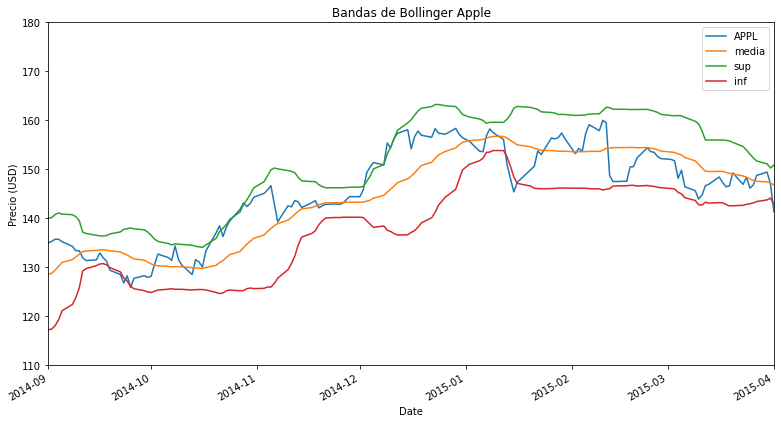

In [414]:
fb=pd.DataFrame()
fb['APPL']=df['AAP']
fb['media']=media_movil['AAP']
fb['sup']=banda_superior['AAP']
fb['inf']=banda_inferior['AAP']
fb.index = pd.to_datetime(fb.index)
f=fb.plot(figsize=(13,7))
plt.title('Bandas de Bollinger Apple')
plt.ylabel('Precio (USD)')
plt.xlim(pd.Timestamp('2014-09-01'),pd.Timestamp('2015-04-01'))
plt.ylim(110,180)
plt.show();

## 6º Calculo del RSI

In [415]:
def RSI(n):
    aux=df.diff()
    sube, baja = aux.copy(),aux.copy()
    sube[sube<0]=0
    baja[baja>0]=0
    media_sube=sube.rolling(14).mean()
    media_baja=baja.abs().rolling(14).mean()
    RS = media_sube/media_baja
    RSI=100-(100/(1+RS))
    return RSI

In [416]:
rsi= RSI(14)

ejemplo del rsi

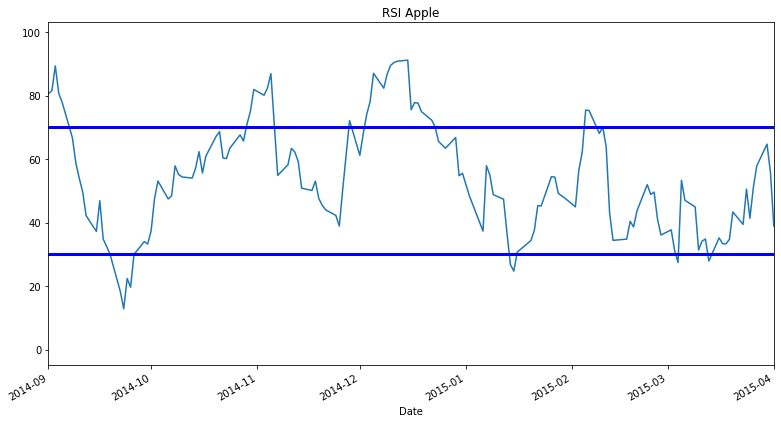

In [417]:
f=rsi['AAP']
f.index = pd.to_datetime(f.index)
fb2=rsi['AAP'].plot(figsize=(13,7))
plt.title('RSI Apple')
plt.xlim(pd.Timestamp('2014-09-01'),pd.Timestamp('2015-04-01'))
plt.axhline(y=30, color='b', linewidth=3)
plt.axhline(y=70, color='b', linewidth=3)
#plt.ylim(110,180)
plt.show();

Bollinger y RSI en la misma grafica

<ipython-input-418-a1e254e24a4a>:4: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([axes[0],axes[1]],


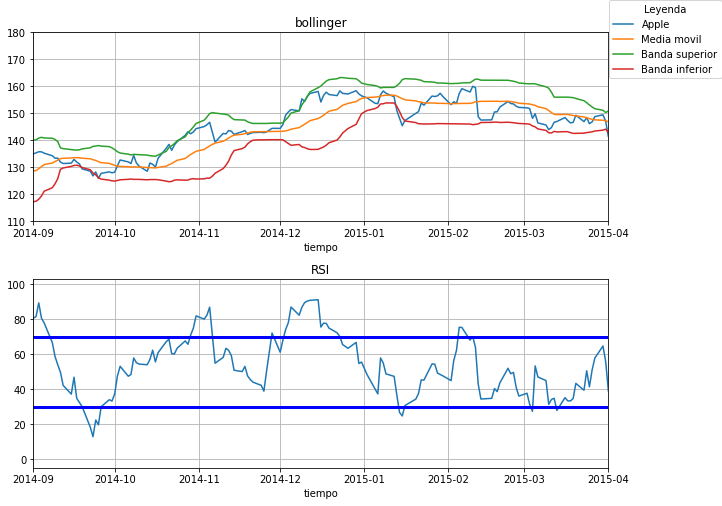

In [418]:
fig, axes = plt.subplots(2,1,figsize=(10,7))#dos subplots
axes[0].plot(fb)#en el 0 pongo bollinger
line_labels = ["Apple", "Media movil", "Banda superior", "Banda inferior"]
fig.legend([axes[0],axes[1]], 
           labels=line_labels,   
           loc="upper right",   
           borderaxespad=0.1,    
           title="Leyenda"  
           )

axes[1].plot(f)#en el 1 pongo rsi

#marco el rango de los ejes
axes[0].set_xlim(pd.Timestamp('2014-09-01'),pd.Timestamp('2015-04-01'))
axes[0].set_ylim(110,180)
axes[1].set_xlim(pd.Timestamp('2014-09-01'),pd.Timestamp('2015-04-01'))

#nombre de los ejes y titulos
axes[0].set_xlabel('tiempo')
axes[1].set_xlabel('tiempo')
axes[0].set_title('bollinger')
axes[1].set_title('RSI')

#lineas de 30 y 70 de rsi
axes[1].axhline(y=30, color='b', linewidth=3)
axes[1].axhline(y=70, color='b', linewidth=3)

#para que no esten apretadas y se ajusten los textos
fig.tight_layout()

#para que se ajuste la leyenda
plt.subplots_adjust(right=0.85)

#mallado del fondo
axes[0].grid()
axes[1].grid()


plt.show()

entrada en el mercado:

## 7º Estableciendo entradas en mercado

In [419]:
def señales(df,media_movil,desviacion_media,banda_superior,banda_inferior,rsi):
    date=df.index
    date = pd.to_datetime(date)
    valor=df.to_numpy()
    med=media_movil.to_numpy()
    std=desviacion_media.to_numpy()
    sup=banda_superior.to_numpy()
    inf=banda_inferior.to_numpy()
    rsi_index=rsi.to_numpy()
    auxiliar_compra=np.zeros(shape=(len(valor),len(valor.T)))
    auxiliar_venta=np.zeros(shape=(len(valor),len(valor.T)))


    for m in range(0,len(med)-1):#iteraciones, quito  k
        for i in range(0,len(med.T)-1):#empresas
            try:
                if rsi_index[m,i]>=70   and valor[m,i]>=sup[m,i]: #señal de venta
                    auxiliar_venta[m,i]-=1
                    
                if valor[m,i]<valor[m-2,i]:#señal de venta
                    auxiliar_venta[m,i]-=1
                    
                if rsi_index[m,i]<rsi_index[m-2,i]:#señal de venta
                    auxiliar_venta[m,i]-=1
                    
                if valor[m,i]>valor[m-2,i]:#señal de compra
                    auxiliar_compra[m,i]+=1

                if rsi_index[m,i]<=30 and  valor[m,i]<=inf[m,i]: #señal de compra
                    auxiliar_compra[m,i]+=1

                if rsi_index[m,i]>rsi_index[m-2,i]:#señal de compra
                    auxiliar_compra[m,i]+=1

            except:
                continue
                
    auxiliar_compra = pd.DataFrame(auxiliar_compra)
    auxiliar_compra = auxiliar_compra.set_index(date)
    auxiliar_venta = pd.DataFrame(auxiliar_venta)
    auxiliar_venta = auxiliar_venta.set_index(date)
    
    return auxiliar_compra, auxiliar_venta

In [420]:
señal_compra, señal_venta=señales(df,media_movil,desviacion_media,banda_superior,banda_inferior,rsi)

In [422]:
señal_compra=señal_compra[señal_compra>=2]
señal_venta=señal_venta[señal_venta<=-2]

## 8º Calculo del retorno

In [441]:
def retorno (df,señal_compra, señal_venta):

    señal_compra=señal_compra.to_numpy()
    señal_venta=señal_venta.to_numpy()
    df = df.to_numpy()
    retorno_compra=np.zeros(shape=(len(df),len(df.T)))
    retorno_venta=np.zeros(shape=(len(df),len(df.T)))
    
    for m in range(0,len(df)-1):#iteraciones, quito  k
        for i in range(0,len(df.T)-1):#empresas
            try:
                if señal_compra[m,i]>= 2:
                    retorno_compra[m,i]=df[m+20,i]/df[m,i]-1

                if señal_venta[m,i]<= -2:
                    retorno_venta[m,i]=-(df[m+20,i]/df[m,i]-1)

            except:
                continue
                          

    
    return(retorno_compra, retorno_venta)

In [442]:
#retorno_venta.head(50)

In [443]:
retorno_compra, retorno_venta =retorno(df,señal_compra, señal_venta)
date=df.index
date = pd.to_datetime(date)
retorno_compra = pd.DataFrame(retorno_compra)
retorno_compra = retorno_compra.set_index(date)
retorno_venta = pd.DataFrame(retorno_venta)
retorno_venta = retorno_venta.set_index(date)

In [444]:
retorno_compra = retorno_compra.replace(0, np.NaN)

In [445]:
retorno_compra=retorno_compra.mean(axis=1)

In [446]:
retorno_compra_total=retorno_compra.cumsum()

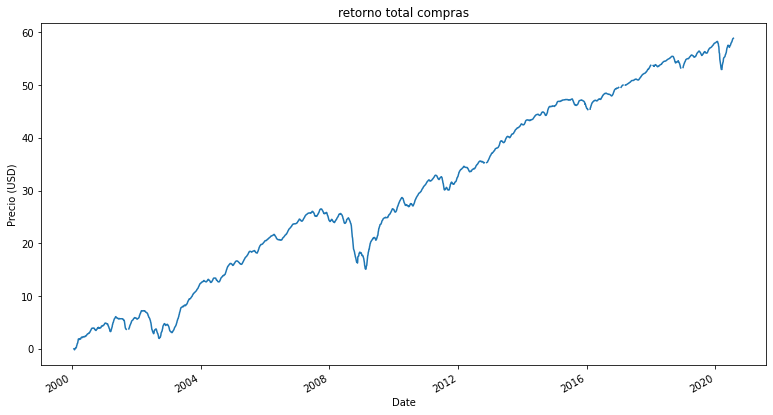

In [447]:
f=retorno_compra_total.plot(figsize=(13,7))
plt.title('retorno total compras')
plt.ylabel('Precio (USD)')
plt.show();

In [448]:
retorno_venta = retorno_venta.replace(0, np.NaN)
retorno_venta=retorno_venta.mean(axis=1)
retorno_venta_total=retorno_venta.cumsum()

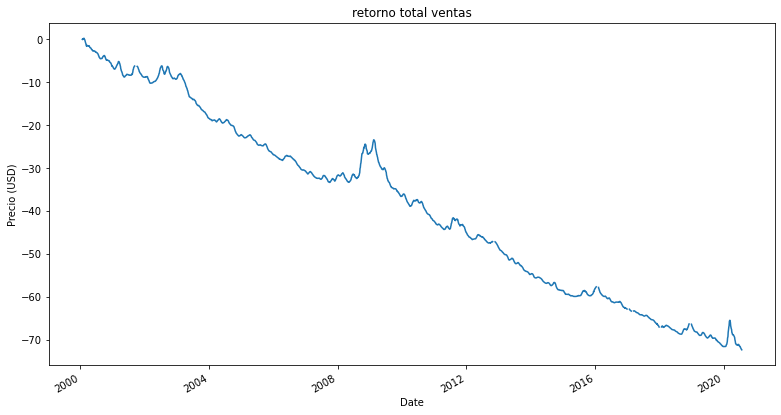

In [449]:
f=retorno_venta_total.plot(figsize=(13,7))
plt.title('retorno total ventas')
plt.ylabel('Precio (USD)')
plt.show();

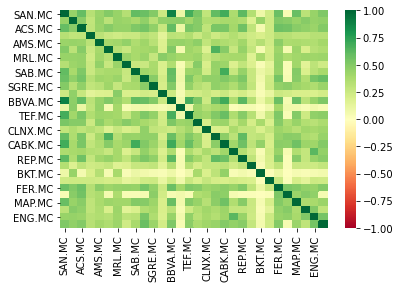

In [23]:
#mostramos correlaciones de retorno de IBEX
df =pd.read_csv('IBEX_joined_closes.csv')
df.set_index('Date', inplace = True)
import seaborn as sns
sns.heatmap(df.pct_change().corr(), annot=False,vmin=-1, vmax=1, cmap='RdYlGn');

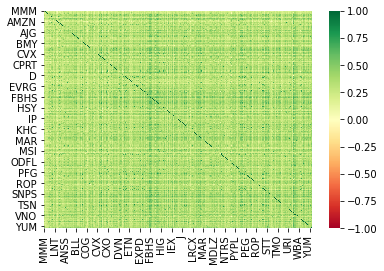

In [20]:
#mostramos correlaciones de retorno de SP500
df =pd.read_csv('SP500_joined_closes.csv')
df.set_index('Date', inplace = True)
import seaborn as sns
sns.heatmap(df.pct_change().corr(), annot=False, fmt=".2", vmin=-1,vmax=1, cmap='RdYlGn');